# To predict diabetes using PIMA diabetes data

### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
data = pd.read_csv("./data/pima-data.csv")

In [3]:
data.shape

(768, 10)

In [4]:
data.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [5]:
# check if any null value is present
data.isnull().values.any()

False

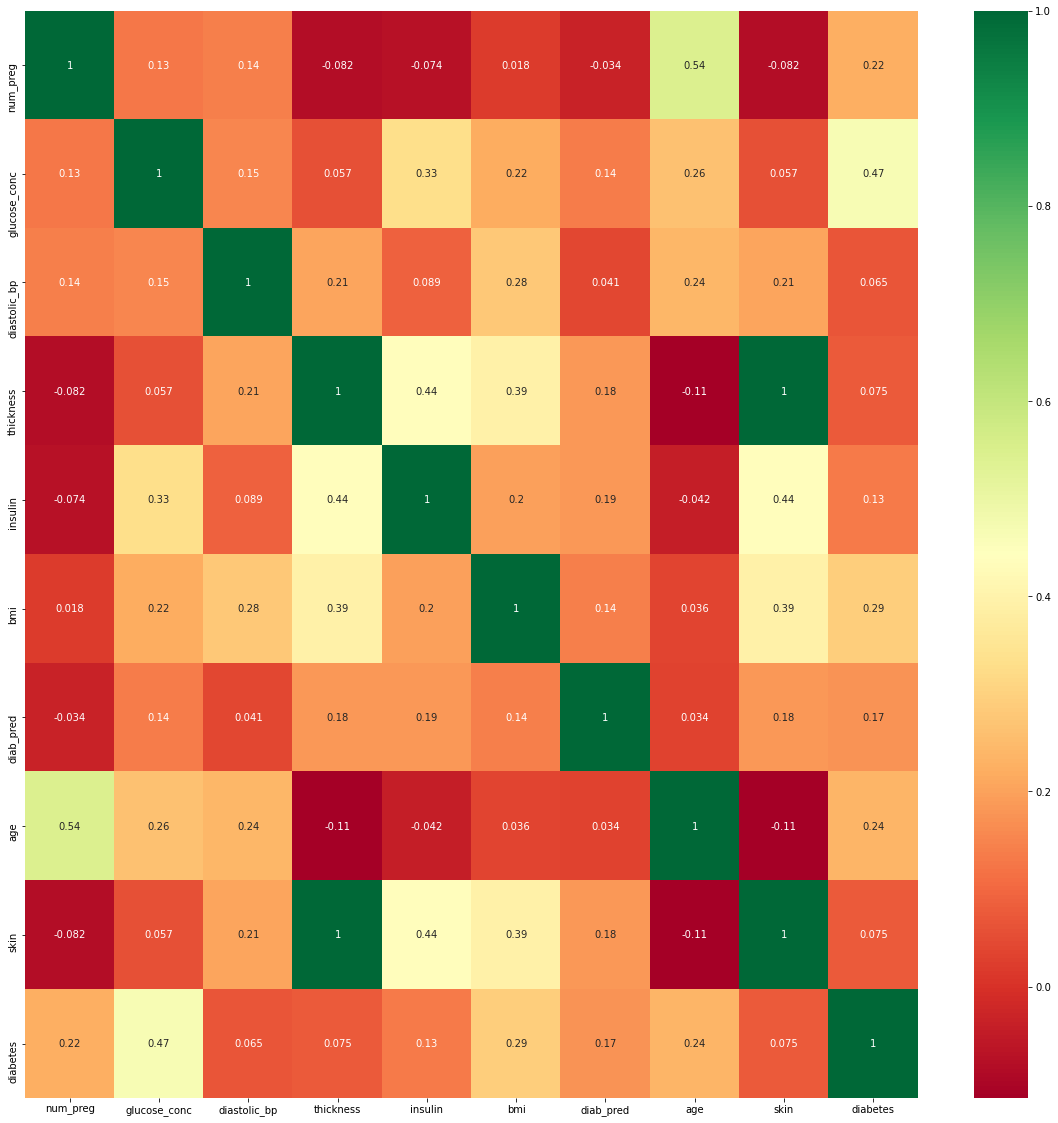

In [6]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [7]:
data.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


## Changing the diabetes column data from boolean to number

In [8]:
diabetes_map = {True: 1, False: 0}

In [9]:
data['diabetes'] = data['diabetes'].map(diabetes_map)

In [10]:
data.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [11]:
diabetes_true_count = len(data.loc[data['diabetes'] == True])
diabetes_false_count = len(data.loc[data['diabetes'] == False])

In [12]:
(diabetes_true_count,diabetes_false_count)

(268, 500)

In [13]:
data.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'skin', 'diabetes'],
      dtype='object')

In [14]:
## Train Test Split

from sklearn.model_selection import train_test_split
feature_columns = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'skin']
predicted_class = ['diabetes']

## Check how many other missing(zero) values

In [15]:
print("total number of rows : {0}".format(len(data)))
print("number of rows missing glucose_conc: {0}".format(len(data.loc[data['glucose_conc'] == 0])))
print("number of rows missing glucose_conc: {0}".format(len(data.loc[data['glucose_conc'] == 0])))
print("number of rows missing diastolic_bp: {0}".format(len(data.loc[data['diastolic_bp'] == 0])))
print("number of rows missing insulin: {0}".format(len(data.loc[data['insulin'] == 0])))
print("number of rows missing bmi: {0}".format(len(data.loc[data['bmi'] == 0])))
print("number of rows missing diab_pred: {0}".format(len(data.loc[data['diab_pred'] == 0])))
print("number of rows missing age: {0}".format(len(data.loc[data['age'] == 0])))
print("number of rows missing skin: {0}".format(len(data.loc[data['skin'] == 0])))

total number of rows : 768
number of rows missing glucose_conc: 5
number of rows missing glucose_conc: 5
number of rows missing diastolic_bp: 35
number of rows missing insulin: 374
number of rows missing bmi: 11
number of rows missing diab_pred: 0
number of rows missing age: 0
number of rows missing skin: 227


In [16]:
data["insulin"].corr(data["skin"])

0.43678257012001365

In [17]:
null_features = [var for var in data.columns if len(data.loc[data[var] == 0])>0] 
null_features

['num_preg',
 'glucose_conc',
 'diastolic_bp',
 'thickness',
 'insulin',
 'bmi',
 'skin',
 'diabetes']

In [18]:
data["diabetes"].isnull().sum()

0

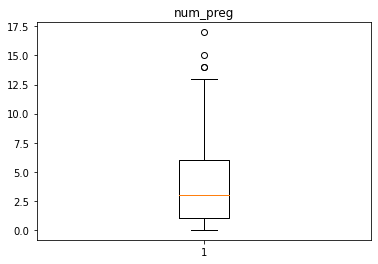

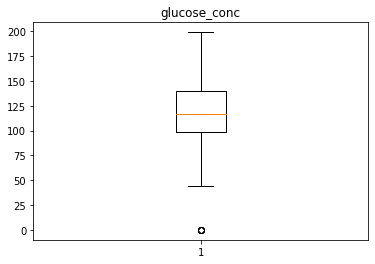

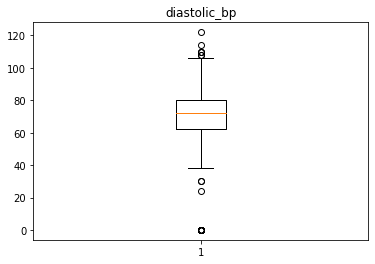

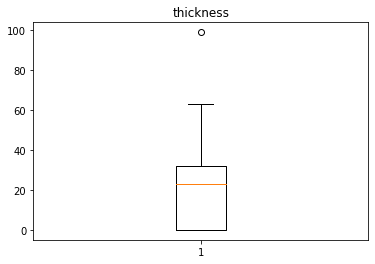

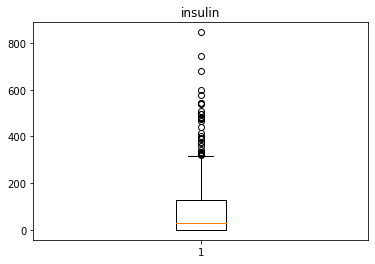

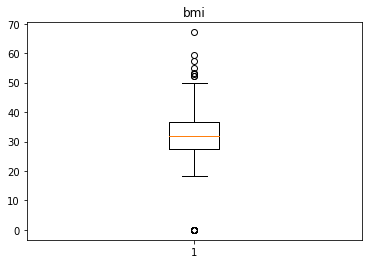

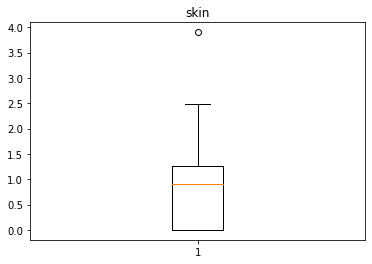

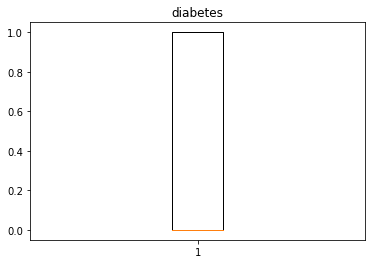

In [19]:
for var in null_features :
    plt.boxplot(data[var])
    plt.title(var)
    plt.show()


In [20]:
data.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'skin', 'diabetes'],
      dtype='object')

In [21]:
data.head(20)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1
5,5,116,74,0,0,25.6,0.201,30,0.0000,0
6,3,78,50,32,88,31.0,0.248,26,1.2608,1
7,10,115,0,0,0,35.3,0.134,29,0.0000,0
8,2,197,70,45,543,30.5,0.158,53,1.7730,1
9,8,125,96,0,0,0.0,0.232,54,0.0000,1


In [22]:
data['num_preg'] = data['num_preg'].replace(0,data["num_preg"].median())
data['glucose_conc'] = data['glucose_conc'].replace(0,data["glucose_conc"].mean())
data['diastolic_bp'] = data['diastolic_bp'].replace(0,data["diastolic_bp"].median())
data['thickness'] = data['thickness'].replace(0,data["thickness"].mean())
data['insulin'] = data['insulin'].replace(0,data["insulin"].median())
data['bmi'] = data['bmi'].replace(0,data["bmi"].median())
data['skin'] = data['skin'].replace(0,data["skin"].mean())

In [23]:
data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148.0,72,35.000000,30.5,33.6,0.627,50,1.379000,1
1,1,85.0,66,29.000000,30.5,26.6,0.351,31,1.142600,0
2,8,183.0,64,20.536458,30.5,23.3,0.672,32,0.809136,1
3,1,89.0,66,23.000000,94.0,28.1,0.167,21,0.906200,0
4,3,137.0,40,35.000000,168.0,43.1,2.288,33,1.379000,1


In [24]:
X = data[feature_columns]
y = data[predicted_class]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

In [25]:
print(X_train.shape,y_train.shape)

(537, 9) (537, 1)


In [26]:
X_train.head(20)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
491,2,89.0,90,30.000000,30.5,33.5,0.292,42,1.182000
69,4,146.0,85,27.000000,100.0,28.9,0.189,27,1.063800
667,10,111.0,70,27.000000,30.5,27.5,0.141,40,1.063800
566,1,99.0,72,30.000000,18.0,38.6,0.412,21,1.182000
97,1,71.0,48,18.000000,76.0,20.4,0.323,22,0.709200
449,3,120.0,74,18.000000,63.0,30.5,0.285,26,0.709200
169,3,111.0,90,12.000000,78.0,28.4,0.495,29,0.472800
392,1,131.0,64,14.000000,415.0,23.7,0.389,21,0.551600
399,3,193.0,70,31.000000,30.5,34.9,0.241,25,1.221400
68,1,95.0,66,13.000000,38.0,19.6,0.334,25,0.512200


In [27]:
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

## logistic regression


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred_log = log_reg.predict(X_test)
accuracy_score(y_test,y_pred_log)

0.7402597402597403

## Support Vector Classifier

In [30]:
from sklearn.svm import SVC
svc_rbf = SVC(kernel="rbf")
svc_rbf.fit(X_train,y_train)
svc_rbf_pred = svc_rbf.predict(X_test)
accuracy_score(y_test,svc_rbf_pred)

0.70995670995671

In [32]:
kernel = ["linear","rbf","poly"]
max_k = ""
max_c = 0
max_acc=0
for ker in kernel :
    for c in range(1,10) :
        classifier_svc = SVC(kernel=ker,C=c)
        classifier_svc.fit(X_train,y_train)
        classifier_svc_pred = classifier_svc.predict(X_test)
        accu = accuracy_score(y_test,classifier_svc_pred)
        if accu > max_acc :
            max_acc = accu
            max_k = ker
            max_c = c
        

print("max accuracy : {} with C is : {} & kernel : {}".format(max_acc,max_c,max_k))


max accuracy : 0.7489177489177489 with C is : 1 & kernel : linear


## DecisionTreeClassifier

In [33]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)
accuracy_score(y_test,dt_pred)

0.696969696969697

## RandomForestClassifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [36]:
y_pred_rf = random_forest_model.predict(X_test)
print("Accuracy = {0:.3f}".format(accuracy_score(y_test, y_pred_rf)))

Accuracy = 0.745


#### HyperParameter Tuning with RandomForestClassifier

In [37]:
from sklearn.model_selection import RandomizedSearchCV
RandomForestClassifier()

In [49]:
params_grid = {
    "n_estimators" : [100,200,400,500,700,800,1000],
    "max_depth":[3, 4, 5, 6, 8, 10, 12, 15],
    "min_samples_split":[2,3,4],
    "min_samples_leaf":[1,2,3], 
}

In [50]:
rf_classifier = RandomForestClassifier()

random_search_rf = RandomizedSearchCV(rf_classifier,param_distributions=params_grid,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [51]:
random_search_rf.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    5.4s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    6.2s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': [100, 200, 400, 500,
                                                         700, 800, 1000]},
                   scoring='roc_auc', verbose=3)

In [52]:
random_search_rf.best_params_, random_search_rf.best_score_

({'n_estimators': 500,
  'min_samples_split': 3,
  'min_samples_leaf': 2,
  'max_depth': 12},
 0.8315504177886807)

In [54]:
random_search_rf_model = RandomForestClassifier(n_estimators= 500,min_samples_split= 3,
                          min_samples_leaf= 2, max_depth= 12)

In [55]:
random_search_rf_model.fit(X_train,y_train)
rf_random_pred = random_search_rf_model.predict(X_test)
accuracy_score(y_test,rf_random_pred)

0.7489177489177489

In [155]:
import warnings
warnings.filterwarnings("ignore")

In [156]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(random_search_rf_model,X,y,cv=10)
score.mean()

0.7603554340396446

## XgBoost Classifier

In [140]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.03,0.05, 0.07,0.10,0.125, 0.15 ] ,
 "max_depth"        : [ 3, 5, 7, 9, 11, 13,15 ],
 "min_child_weight" : [ 1, 3, 5, 7],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ,0.5],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7,0.9 ],
  "booster" :["gbtree","gblinear"],
  "n_estimators":[50,100,150,180,200,250,300,400],
    "base_score" :[0.3,0.5,0.8]
}


In [141]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [142]:
classifier=xgboost.XGBClassifier()

In [143]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [144]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [145]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    3.6s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    8.9s finished


[11:43:15] WARNING: ../src/learner.cc:541: 
Parameters: { colsample_bytree, gamma, max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:43:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 9.25 seconds.


In [146]:
random_search.best_estimator_

XGBClassifier(base_score=0.3, booster='gblinear', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.9, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.125, max_delta_step=None, max_depth=13,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=8, num_parallel_tree=None,
              random_state=0, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
              subsample=None, tree_method=None, validate_parameters=1,
              verbosity=None)

In [147]:
classifier=xgboost.XGBClassifier(base_score=0.3, booster='gblinear', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.9, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.125, max_delta_step=None, max_depth=13,
              min_child_weight=1, missing=np.nan, monotone_constraints=None,
              n_estimators=400, n_jobs=8, num_parallel_tree=None,
              random_state=0, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
              subsample=None, tree_method=None, validate_parameters=1,
              verbosity=None)

In [148]:
classifier.fit(X_train,y_train)
xg_pred = classifier.predict(X_test)
accuracy_score(y_test,xg_pred)

[11:43:32] WARNING: ../src/learner.cc:541: 
Parameters: { colsample_bytree, gamma, max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:43:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.696969696969697

In [149]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,y,cv=10)

[11:43:37] WARNING: ../src/learner.cc:541: 
Parameters: { colsample_bytree, gamma, max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:43:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:43:37] WARNING: ../src/learner.cc:541: 
Parameters: { colsample_bytree, gamma, max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:

In [150]:
score

array([0.74025974, 0.75324675, 0.76623377, 0.64935065, 0.75324675,
       0.79220779, 0.77922078, 0.79220779, 0.73684211, 0.84210526])

In [151]:
score.mean()  #cross_va_score

0.7604921394395079

# Artificial Neural Network

In [158]:
import keras
from keras.models import Sequential
from keras.layers import Dense, ReLU

In [160]:
X_train.shape

(537, 9)

In [161]:

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 9))
# units-> output dim ,  kernel_initializer-> initialize the weights

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

classifier.compile(optimizer="adam",loss="binary_crossentropy" ,metrics=["accuracy"])

model_history = classifier.fit(X_train,y_train,validation_split=0.33, batch_size=10,epochs=100)

print(model_history.history.keys())


Epoch 1/100
36/36 [==============================] - 4s 15ms/step - loss: 77.7093 - accuracy: 0.3612 - val_loss: 42.1403 - val_accuracy: 0.3596
Epoch 2/100
36/36 [==============================] - 0s 2ms/step - loss: 42.8217 - accuracy: 0.3557 - val_loss: 22.7379 - val_accuracy: 0.4157
Epoch 3/100
36/36 [==============================] - 0s 2ms/step - loss: 23.9585 - accuracy: 0.4100 - val_loss: 13.0089 - val_accuracy: 0.4888
Epoch 4/100
36/36 [==============================] - 0s 2ms/step - loss: 13.3481 - accuracy: 0.4581 - val_loss: 8.4419 - val_accuracy: 0.4888
Epoch 5/100
36/36 [==============================] - 0s 2ms/step - loss: 9.9692 - accuracy: 0.4492 - val_loss: 7.1561 - val_accuracy: 0.4831
Epoch 6/100
36/36 [==============================] - 0s 2ms/step - loss: 9.7557 - accuracy: 0.4660 - val_loss: 6.7096 - val_accuracy: 0.4888
Epoch 7/100
36/36 [==============================] - 0s 2ms/step - loss: 7.5132 - accuracy: 0.4914 - val_loss: 6.3647 - val_accuracy: 0.5056
Epoch

Epoch 59/100
36/36 [==============================] - 0s 2ms/step - loss: 0.9579 - accuracy: 0.7123 - val_loss: 0.9845 - val_accuracy: 0.6573
Epoch 60/100
36/36 [==============================] - 0s 2ms/step - loss: 1.1691 - accuracy: 0.7042 - val_loss: 0.9985 - val_accuracy: 0.6629
Epoch 61/100
36/36 [==============================] - 0s 2ms/step - loss: 0.9837 - accuracy: 0.6762 - val_loss: 1.1680 - val_accuracy: 0.6742
Epoch 62/100
36/36 [==============================] - 0s 2ms/step - loss: 1.2385 - accuracy: 0.6654 - val_loss: 0.9055 - val_accuracy: 0.6798
Epoch 63/100
36/36 [==============================] - 0s 2ms/step - loss: 1.1080 - accuracy: 0.6812 - val_loss: 0.9533 - val_accuracy: 0.6742
Epoch 64/100
36/36 [==============================] - 0s 2ms/step - loss: 1.1961 - accuracy: 0.6066 - val_loss: 0.8814 - val_accuracy: 0.6629
Epoch 65/100
36/36 [==============================] - 0s 2ms/step - loss: 0.9964 - accuracy: 0.6839 - val_loss: 1.0082 - val_accuracy: 0.6854
Epoch 

In [163]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#y_pred
y_pred = (y_pred > 0.5)
#y_pred

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm



array([[126,  18],
       [ 57,  30]])

In [164]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.6753246753246753

## ANN-HyperParameterTuning using GridSearchCV and KerasClassifier

In [170]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.activations import relu, sigmoid

In [171]:
def create_model(layers,activation) :
    model = Sequential()
    for i,nodes in enumerate(layers) :
        if i==0 :
            model.add(Dense(nodes,input_dim = X_train.shape[1]))
            model.add(Activation(activation))
            
        else :
            model.add(Dense(nodes))
            model.add(Activation(activation))
        
    model.add(Dense(units=1, kernel_initializer="glorot_uniform",activation="sigmoid"))
    model.compile(optimizer="adam", loss="binary_crossentropy",metrics=["accuracy"])
    
    return model

In [172]:
model = KerasClassifier(build_fn=create_model,verbose=0)

In [173]:
layers=[(5,7,8,11),(6,10,12,15,18),(5,9,16,12,8,10)]
activations = ('sigmoid','relu')
batch_size = [50,75,100,125,150]
epochs=[10,25,40,55]

params = dict(layers=layers, activation=activations, batch_size=batch_size, epochs= epochs)

In [174]:
grid = GridSearchCV(estimator=model, param_grid=params, cv=10)

In [175]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fa78dd9abb0>,
             param_grid={'activation': ('sigmoid', 'relu'),
                         'batch_size': [50, 75, 100, 125, 150],
                         'epochs': [10, 25, 40, 55],
                         'layers': [(5, 7, 8, 11), (6, 10, 12, 15, 18),
                                    (5, 9, 16, 12, 8, 10)]})

In [176]:
pred_y = grid.predict(X_test)
y_pred = (pred_y > 0.5)
y_pred


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [177]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[131,  13],
       [ 61,  26]])

In [178]:

from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.6796536796536796